# Project o1

### Importing "PS4_GamesSales.csv" file 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the CSV file
df = pd.read_csv("PS4_GamesSales.csv", encoding='ISO-8859-1')

### Check null values, drop then and add new cleaned data in null value drop.csv

In [2]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Display missing values information
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64


In [3]:
# Fill missing values in 'Year' with the mean year (converted to an integer)
df['Year'].fillna(int(df['Year'].mean()), inplace=True)

# Fill missing values in 'Publisher' with the mode (most frequent value)
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'cleaned_file.csv'  # Replace with the desired path for the cleaned file
df.to_csv(cleaned_file_path, index=False)

print(f"Missing values in 'Year' filled with mean (as integer) and in 'Publisher' filled with mode. Cleaned data saved to {cleaned_file_path}.")


Missing values in 'Year' filled with mean (as integer) and in 'Publisher' filled with mode. Cleaned data saved to cleaned_file.csv.


### Importing new cleaned data file and work in it

In [4]:
df = pd.read_csv('cleaned_file.csv')
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


## 1. Identify the top 5 best-selling games globally.

In [5]:
# Identify the top 5 best-selling games in the 'Global' column
top_5_games = df.nlargest(5, 'Global')

# Display the top 5 best-selling games
print("Top 5 Best-Selling Games (Global):")
print(top_5_games[['Game', 'Global']])


Top 5 Best-Selling Games (Global):
                        Game  Global
0         Grand Theft Auto V   19.39
1  Call of Duty: Black Ops 3   15.09
2      Red Dead Redemption 2   13.94
3         Call of Duty: WWII   13.40
4                    FIFA 18   11.80


## 2. Compare regional sales (North America, Europe, Japan, and Rest of World) for each genre to understand market preferences.

Regional Sales Comparison by Genre:
                  North America  Europe  Japan  Rest of World
Genre                                                        
Action                    48.15   57.53  10.27          20.76
Action-Adventure          22.30   27.79   1.96           9.83
Adventure                  5.27    6.08   1.64           2.23
Fighting                   8.58    6.19   1.67           2.98
MMO                        1.32    1.45   0.20           0.55
Misc                       3.64    6.03   0.96           1.85
Music                      2.40    1.62   0.17           0.84
Party                      0.09    0.47   0.00           0.10
Platform                   5.48    8.92   0.67           2.77
Puzzle                     0.28    0.16   0.00           0.10
Racing                     5.86   14.77   0.76           3.81
Role-Playing              22.15   22.40   9.42           8.91
Shooter                   50.50   58.64   4.42          21.48
Simulation                 1.47   

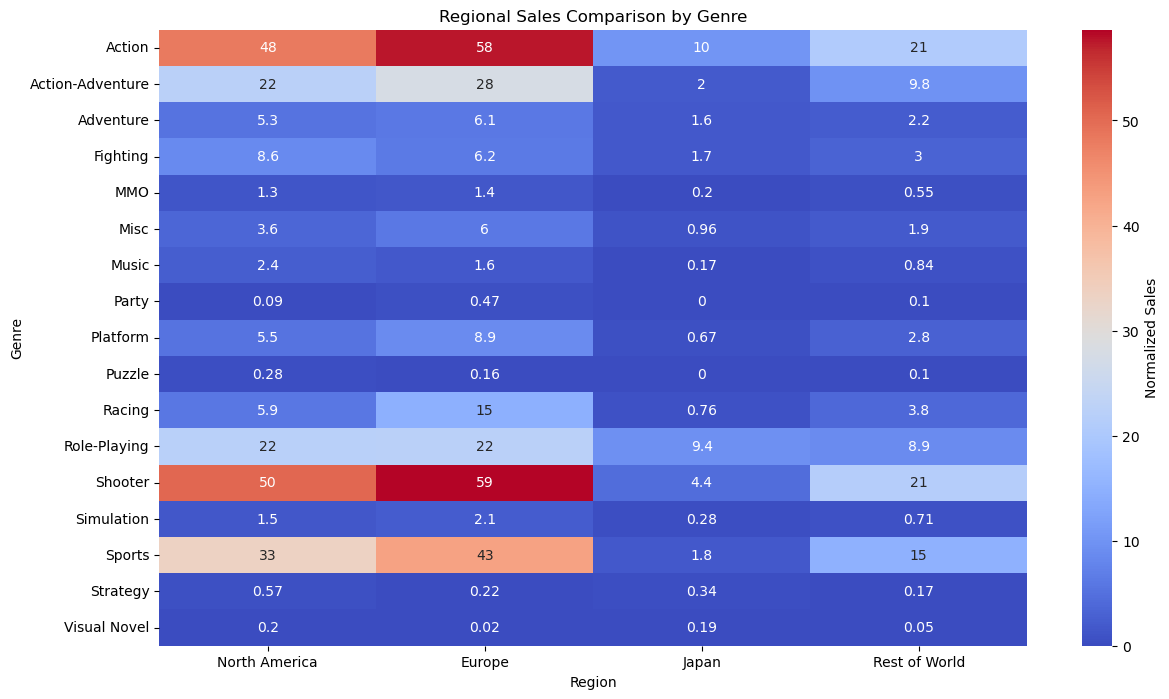

In [6]:

# Group by genre and sum regional sales
genre_sales = df.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
# Display the regional sales for each genre
print("Regional Sales Comparison by Genre:")
print(genre_sales)

# Plot the sales comparison
plt.figure(figsize=(14, 8))
sns.heatmap(genre_sales, annot=True, cmap="coolwarm", cbar_kws={'label': 'Normalized Sales'})
plt.title('Regional Sales Comparison by Genre')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.show()


## 3. Find the publisher with the highest total global sales.

In [7]:
# Group by publisher and sum global sales
publisher_sales = df.groupby('Publisher')['Global'].sum()

# Find the publisher with the highest total global sales
top_publisher = publisher_sales.idxmax()
top_sales = publisher_sales.max()

# Display the publisher with the highest total global sales
print(f"The publisher with the highest total global sales is {top_publisher} with {top_sales} units sold.")


The publisher with the highest total global sales is Activision with 72.44 units sold.


## 4. Analyze the year with the highest number of game releases.

In [8]:
# Count the number of game releases per year
yearly_release = df.groupby('Year')['Game'].count()
# yearly_releases = df['Year'].value_counts()

# Find the year with the highest number of game releases
top_year = yearly_release.idxmax()
top_releases = yearly_release.max()

# Display the year with the highest number of game releases
print(f"The year with the highest number of game releases is {top_year} with {top_releases} releases.")


The year with the highest number of game releases is 2015.0 with 381 releases.


## 5. Determine the most popular genre globally based on total sales

In [9]:
# Group by genre and sum global sales
genre_sales = df.groupby('Genre')['Global'].sum()

# Find the genre with the highest total global sales
most_popular_genre = genre_sales.idxmax()
total_sales = genre_sales.max()

# Display the most popular genre globally based on total sales
print(f"The most popular genre globally based on total sales is {most_popular_genre} with {total_sales} units sold.")


The most popular genre globally based on total sales is Action with 136.85 units sold.


## 6. Identify the game with the highest sales in Japan compared to other regions.

In [10]:
# Find the game with the highest sales in Japan
top_game_japan = df.loc[df['Japan'].idxmax()]

# Display the game with the highest sales in Japan
print("The game with the highest sales in Japan:")
print(f"Game: {top_game_japan['Game']}")
print(f"Japan Sales: {top_game_japan['Japan']}")


The game with the highest sales in Japan:
Game: Monster Hunter: World
Japan Sales: 2.17


In [11]:
# Calculate the correlation between North America and Europe sales
correlation = df['North America'].corr(df['Europe'])

# Display the correlation
print(f"The correlation between sales in North America and Europe is {correlation:.2f}.")


The correlation between sales in North America and Europe is 0.82.


In [12]:
# Filter data for "Action" and "Shooter" genres
action_sales = df[df['Genre'] == 'Action'].groupby('Year')['Global'].sum()
shooter_sales = df[df['Genre'] == 'Shooter'].groupby('Year')['Global'].sum()

# Combine the sales data into a single DataFrame
combined_sales = pd.DataFrame({
    'Action': action_sales,
    'Shooter': shooter_sales
})

# Display the sales growth trend for "Action" and "Shooter" genres
print("Sales Growth Trend for 'Action' and 'Shooter' Genres:")
print(combined_sales)


Sales Growth Trend for 'Action' and 'Shooter' Genres:
        Action  Shooter
Year                   
2013.0    1.91    11.13
2014.0   31.97    21.38
2015.0   29.76    36.95
2016.0   25.89    34.34
2017.0   30.51    30.92
2018.0   16.81     0.27
2019.0    0.00     0.00
2020.0    0.00      NaN


In [13]:
# Group by publisher and sum regional sales
publisher_sales = df.groupby('Publisher')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

# Identify the top publisher in each region
top_publisher_na = publisher_sales['North America'].idxmax()
top_publisher_eu = publisher_sales['Europe'].idxmax()
top_publisher_jp = publisher_sales['Japan'].idxmax()
top_publisher_rw = publisher_sales['Rest of World'].idxmax()

# Display the top publisher in terms of sales for each region
print(f"Top Publisher in North America: {top_publisher_na}")
print(f"Top Publisher in Europe: {top_publisher_eu}")
print(f"Top Publisher in Japan: {top_publisher_jp}")
print(f"Top Publisher in Rest of the World: {top_publisher_rw}")


Top Publisher in North America: Activision
Top Publisher in Europe: Activision
Top Publisher in Japan: Square Enix
Top Publisher in Rest of the World: Activision


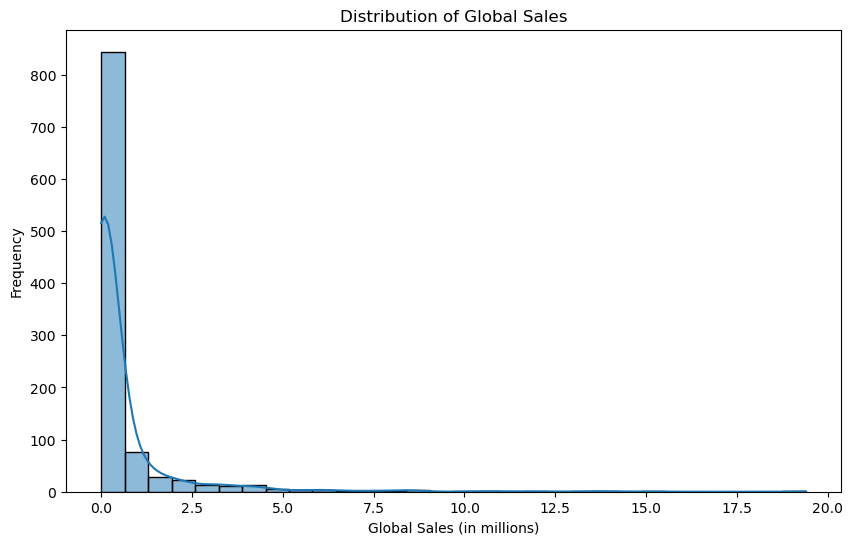

In [14]:
# Plot the distribution of global sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global'], kde=True, bins=30)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()


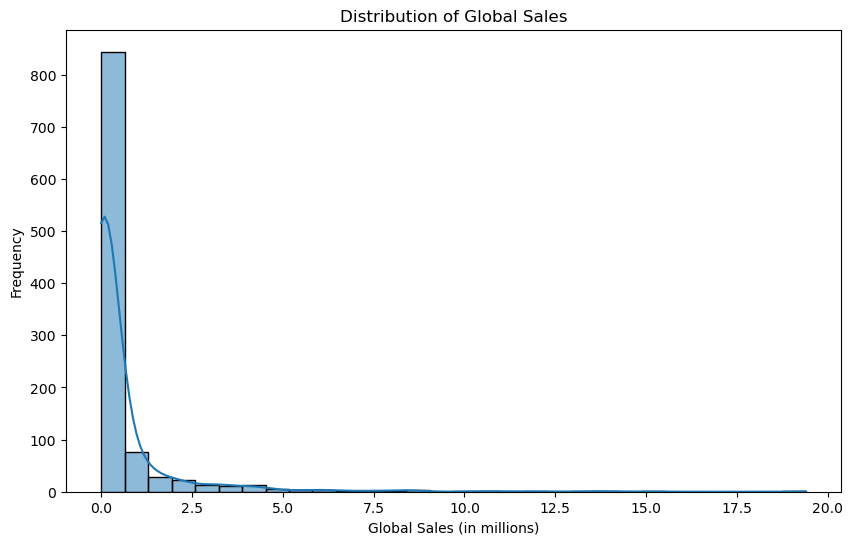

In [15]:
# Plot the distribution of global sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global'], kde=True, bins=30)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()


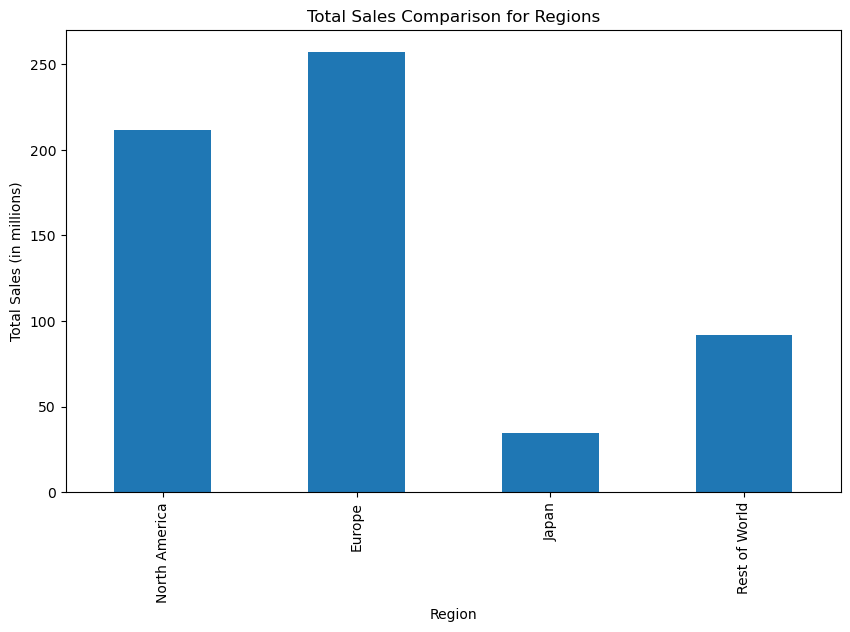

In [16]:
# Sum total sales for each region
region_sales = df[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

# Plot the total sales comparison for regions
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.title('Total Sales Comparison for Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.show()


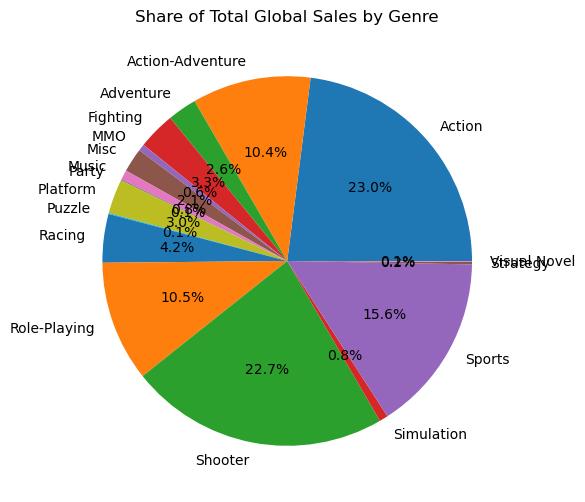

In [17]:
# Sum global sales by genre
genre_sales = df.groupby('Genre')['Global'].sum()

# Plot the share of total global sales by genre
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Share of Total Global Sales by Genre')
plt.ylabel('')  # Hide the y-label
plt.show()


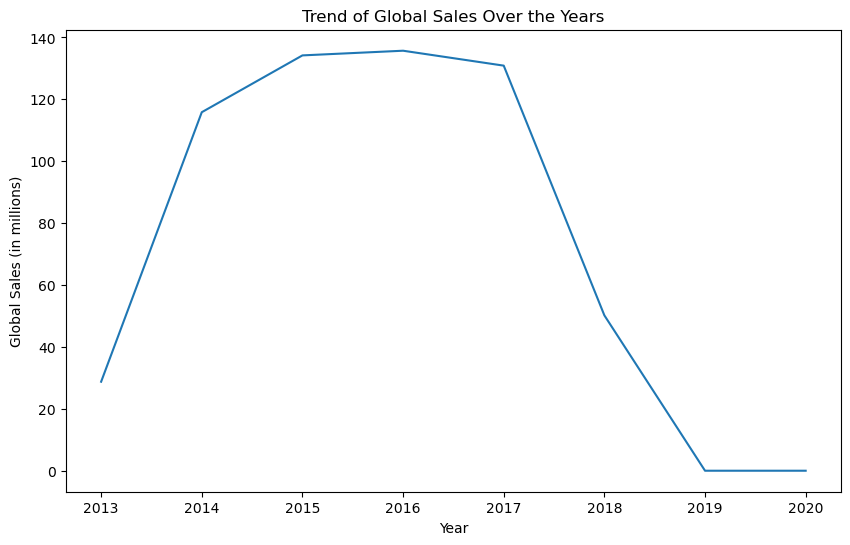

In [18]:
# Sum global sales by year
yearly_sales = df.groupby('Year')['Global'].sum()

# Plot the trend of global sales over the years
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line')
plt.title('Trend of Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()


<Figure size 1000x600 with 0 Axes>

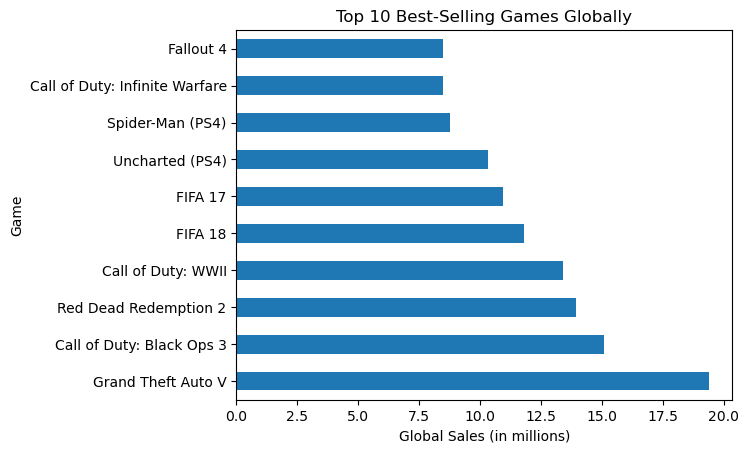

In [19]:
# Find the top 10 best-selling games globally
top_10_games = df.nlargest(10, 'Global')[['Game', 'Global']]

# Plot the top 10 best-selling games globally
plt.figure(figsize=(10, 6))
top_10_games.plot(kind='barh', x='Game', y='Global', legend=False)
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game')
plt.show()


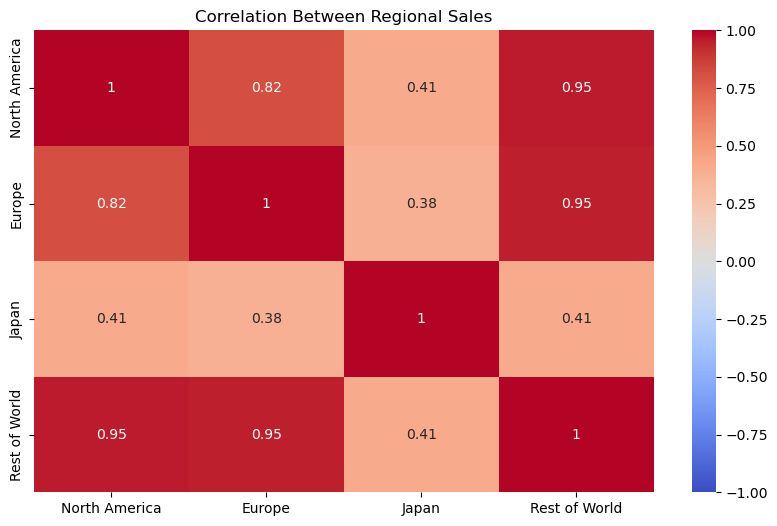

In [20]:
# Calculate the correlation matrix for regional sales
correlation_matrix = df[['North America', 'Europe', 'Japan', 'Rest of World']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Regional Sales')
plt.show()


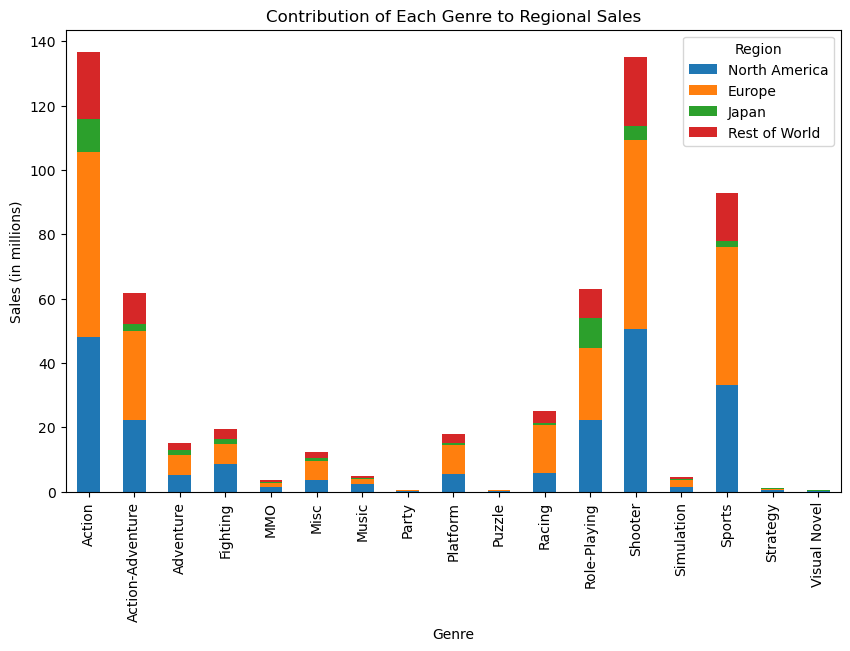

In [21]:
# Sum sales by genre and region
genre_region_sales = df.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

# Plot the contribution of each genre to regional sales
genre_region_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Contribution of Each Genre to Regional Sales')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.show()
